In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
dat1=pd.read_csv(r'C:\Users\Admin\Desktop\R Class\911.csv')

In [4]:
dat1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
# Top 5 Zip Codes

In [7]:
dat1['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [8]:
# top 5 townships (twp) for 911 calls

In [9]:
dat1['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [10]:
# No Of Total Unique Title Codes

In [11]:
len(dat1['title'].unique())

141

In [12]:
# Unique reasons

In [13]:
x=dat1['title'].iloc[0]

In [14]:
x

'EMS: BACK PAINS/INJURY'

In [15]:
x.split(':')[0]

'EMS'

In [16]:
dat1['Reason']=dat1['title'].apply(lambda title:title.split(':')[0])
dat1['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [17]:
dat1['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

In [18]:
#Here EMS has the highest number of value counts of reason

In [19]:
#Here is count plot of reason by using seaborn

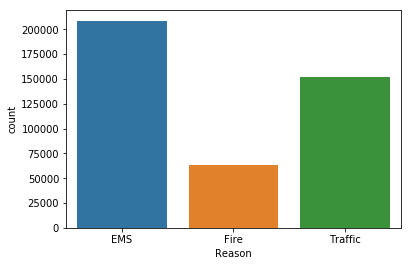

In [20]:
sns.countplot(x='Reason',data=dat1)

In [21]:
#data type of the objects in the timeStamp column

In [22]:
type(dat1['timeStamp'].iloc[0])

str

In [23]:
dat1['timeStamp']=pd.to_datetime(dat1['timeStamp'])

In [24]:
type(dat1['timeStamp'].iloc[0])  #This is a datetime object now

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
time=dat1['timeStamp'].iloc[0]

In [26]:
time

Timestamp('2015-12-10 17:10:52')

In [27]:
time.hour

17

In [28]:
time.month

12

In [29]:
time.year

2015

In [30]:
dat1['Hour']=dat1['timeStamp'].apply(lambda time:time.hour)

In [31]:
dat1['Month']=dat1['timeStamp'].apply(lambda time:time.month)
dat1['Day Of The Week']=dat1['timeStamp'].apply(lambda time:time.dayofweek)
dat1['Year']=dat1['timeStamp'].apply(lambda time:time.year)

In [32]:
dat1.head() # here we see there are 4 new colums

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of The Week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015


In [33]:
#String name of Day of the Week

In [34]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [35]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [36]:
dat1['Day Of The Week']=dat1['Day Of The Week'].map(dmap)

In [37]:
dat1.head() # now day of the week colum is a string after using this function

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of The Week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


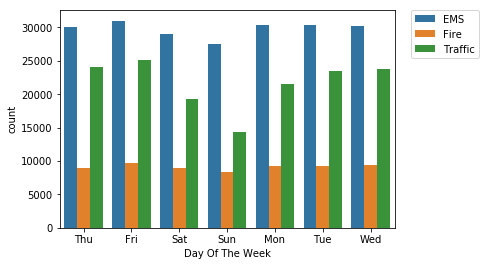

In [38]:
sns.countplot(x='Day Of The Week',data=dat1,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) #

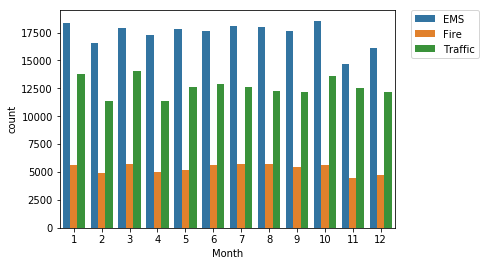

In [39]:
sns.countplot(x='Month',data=dat1,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [40]:
byMonth=dat1.groupby('Month').count()
byMonth.head()



,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of The Week,Year
Month,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644,35644


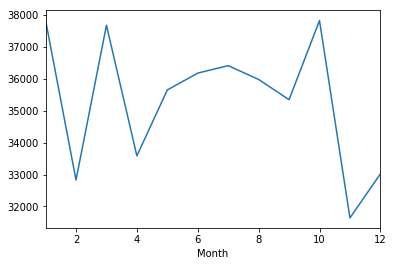

In [41]:
byMonth['lat'].plot()

In [42]:
#seaborn's lmplot() to create a linear fit on the number of calls per month

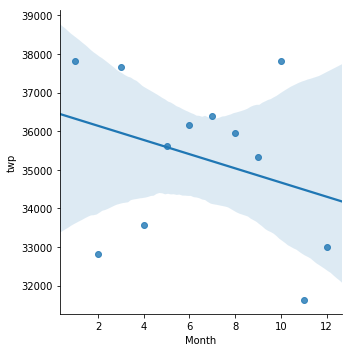

In [43]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

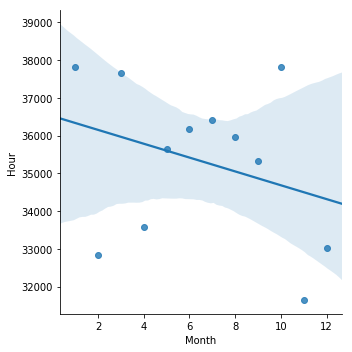

In [44]:
sns.lmplot(x='Month',y='Hour',data=byMonth.reset_index())

In [45]:
dat1['Date']=dat1['timeStamp'].apply(lambda time:time.date())

In [47]:
dat1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of The Week,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015,2015-12-10


In [48]:
dat1.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of The Week,Year
Date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444


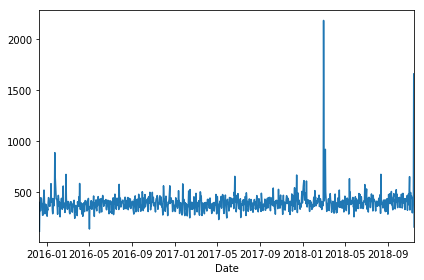

In [51]:
dat1.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [53]:
#Now we are gonna recreate the plots with 3 different reasons( Trafic, Fire, and EMS)

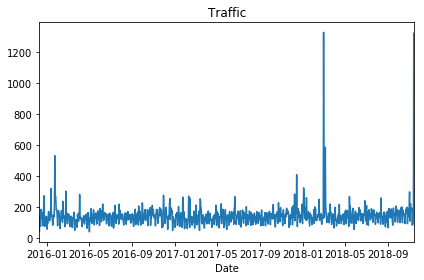

In [54]:
dat1[dat1['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

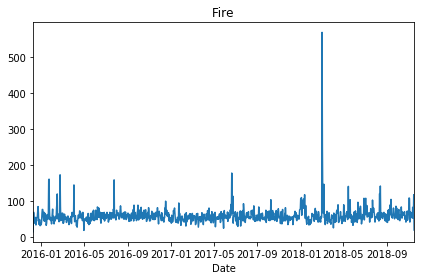

In [55]:
dat1[dat1['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

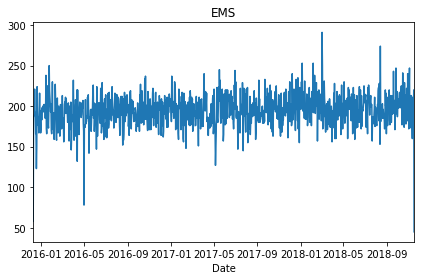

In [56]:
dat1[dat1['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [57]:
#Create heatmap of calling rate in every hour in the week

In [60]:
dat1.groupby(by=['Day Of The Week','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of The Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
Tue,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
Wed,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399


In [61]:
dayhour=dat1.groupby(by=['Day Of The Week','Hour']).count()['Reason'].unstack()

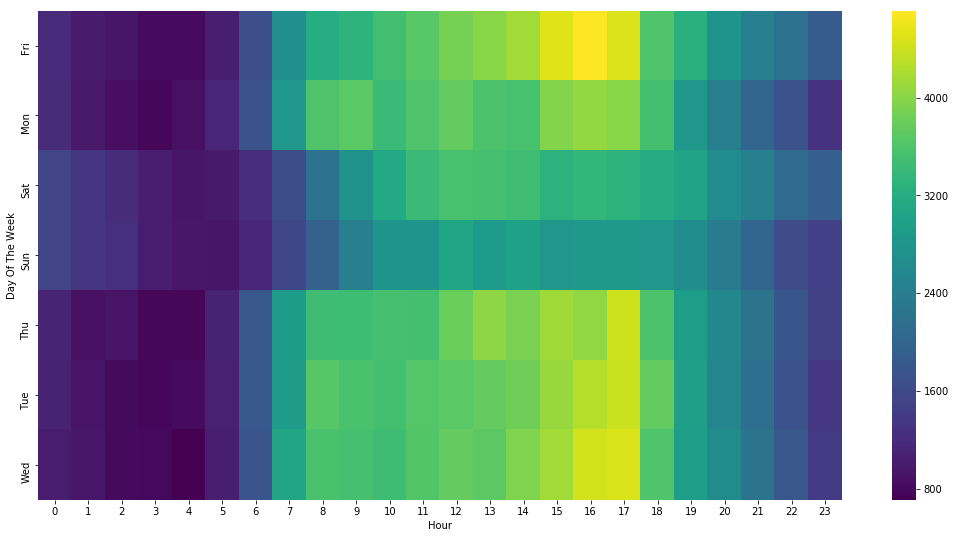

In [69]:
plt.figure(figsize=(18,9))
sns.heatmap(dayhour,cmap='viridis')


In [70]:
#Creating a clustermap

<Figure size 1296x648 with 0 Axes>

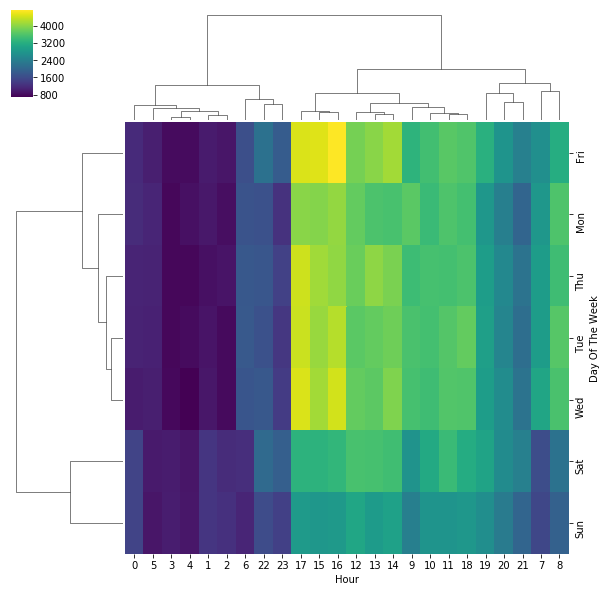

In [73]:
plt.figure(figsize=(18,9))
sns.clustermap(dayhour,cmap='viridis')

In [74]:
daytwp=dat1.groupby(by=['Day Of The Week','twp']).count()['Reason'].unstack()

In [75]:
daytwp

twp,ABINGTON,AMBLER,BERKS COUNTY,BRIDGEPORT,BRYN ATHYN,BUCKS COUNTY,CHELTENHAM,CHESTER COUNTY,COLLEGEVILLE,CONSHOHOCKEN,...,UPPER MORELAND,UPPER POTTSGROVE,UPPER PROVIDENCE,UPPER SALFORD,WEST CONSHOHOCKEN,WEST NORRITON,WEST POTTSGROVE,WHITEMARSH,WHITPAIN,WORCESTER
Day Of The Week,,,,,,,,,,,,,,,,,,,,,
Fri,4128,419,146,344,136,263,3128,700,288,512,...,2293,324,1591,211,594,1114,299,1884,1275,587
Mon,3774,396,150,357,107,189,2919,664,230,532,...,2129,265,1431,168,469,1109,251,1554,1339,544
Sat,3329,400,168,310,106,246,2588,627,338,453,...,1878,359,1445,159,432,933,364,1383,995,491
Sun,2886,348,157,277,88,189,2337,578,272,449,...,1652,255,1286,149,397,778,247,1302,948,454
Thu,3789,369,177,339,123,185,2863,715,277,545,...,2242,354,1567,178,512,1032,297,1730,1344,645
Tue,3909,401,171,352,122,196,2877,696,225,499,...,2217,325,1483,159,511,1028,273,1690,1353,573
Wed,4020,405,150,343,153,172,2917,696,290,600,...,2296,301,1486,206,532,1016,294,1739,1385,575


In [79]:
#Lets compare call rate with area wise by heatmap

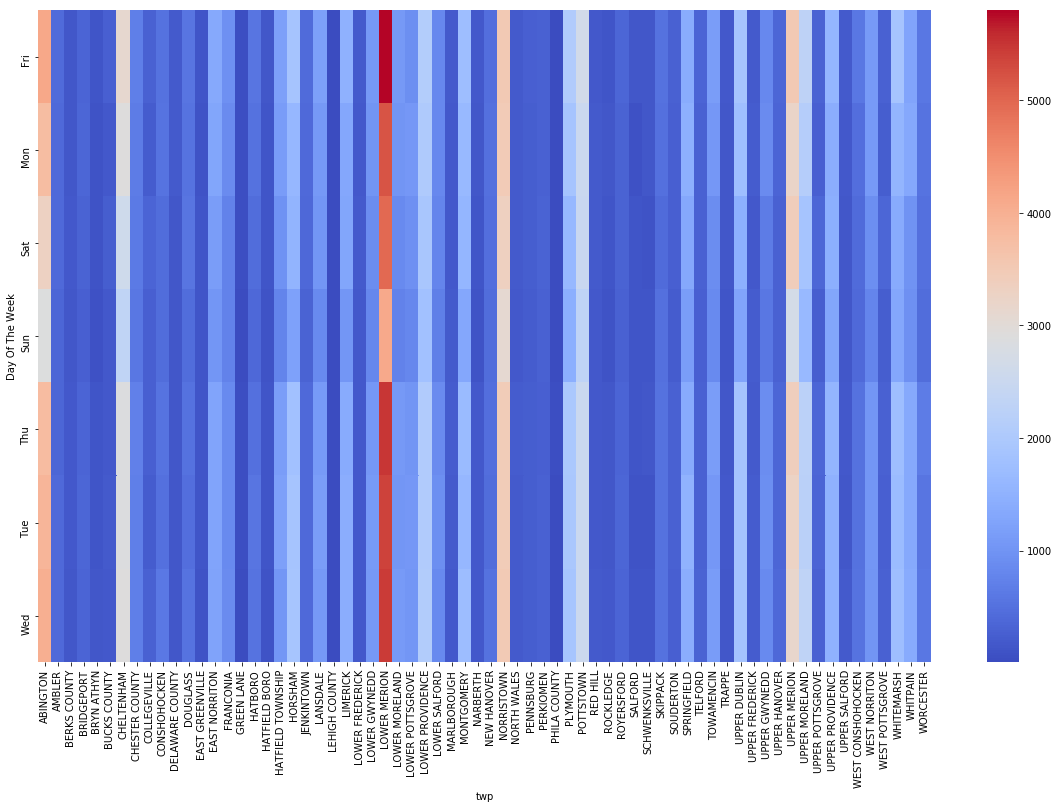

In [84]:
plt.figure(figsize=(20,12))
sns.heatmap(daytwp,cmap='coolwarm')

<Figure size 1440x864 with 0 Axes>

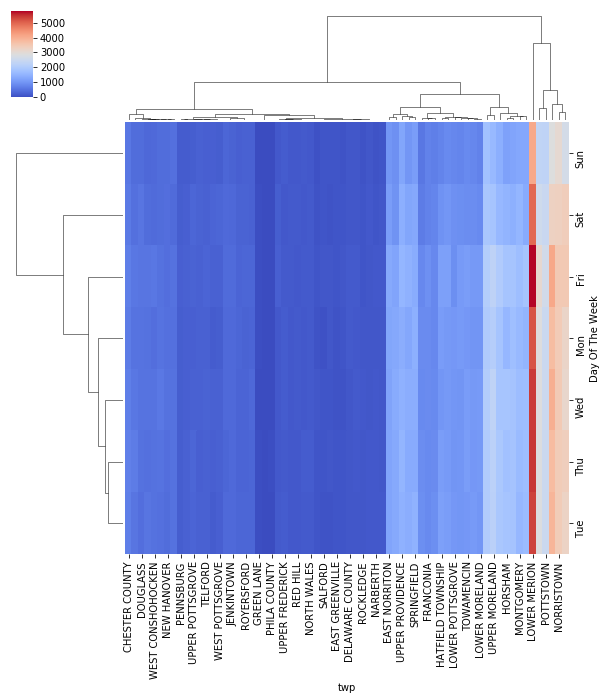

In [87]:
plt.figure(figsize=(20,12))
sns.clustermap(daytwp,cmap='coolwarm')

In [80]:
daymonth=dat1.groupby(by=['Day Of The Week','Month']).count()['Reason'].unstack()

In [81]:
#Heatmap of Month

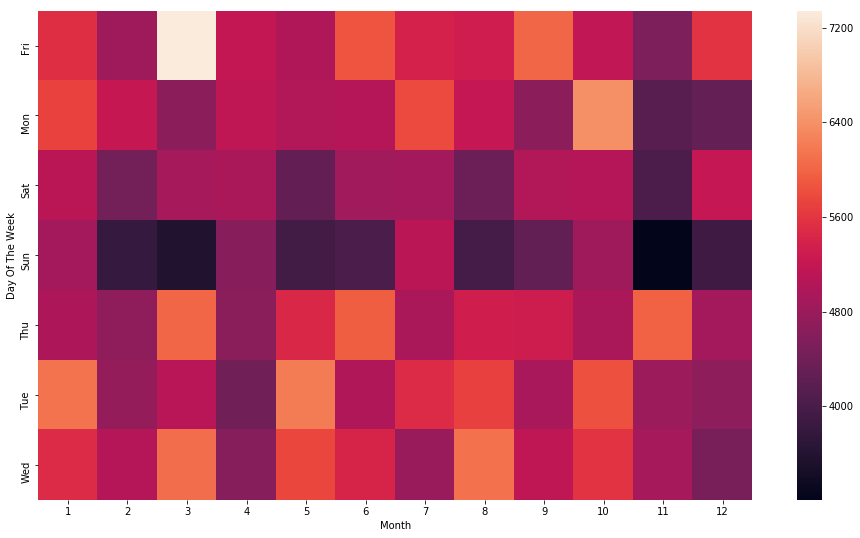

In [82]:
plt.figure(figsize=(16,9))
sns.heatmap(daymonth)


<Figure size 1152x648 with 0 Axes>

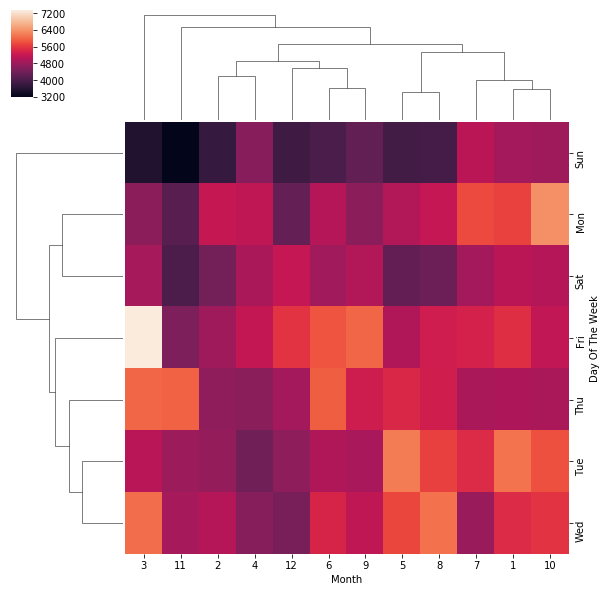

In [83]:
plt.figure(figsize=(16,9))
sns.clustermap(daymonth)

In [92]:
dat1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of The Week,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015,2015-12-10


In [94]:
#Now lets comapre how many calls occured? during the months of every year

In [93]:
dayyear=dat1.groupby(by=['Month','Year']).count()['Reason'].unstack()

In [95]:
dayyear.head()

Year,2015,2016,2017,2018
Month,,,,
1,NaN,13096.0,11605.0,13123.0
2,NaN,11396.0,10267.0,11165.0
3,NaN,11059.0,11684.0,14923.0
4,NaN,11287.0,11056.0,11240.0
5,NaN,11374.0,11719.0,12551.0


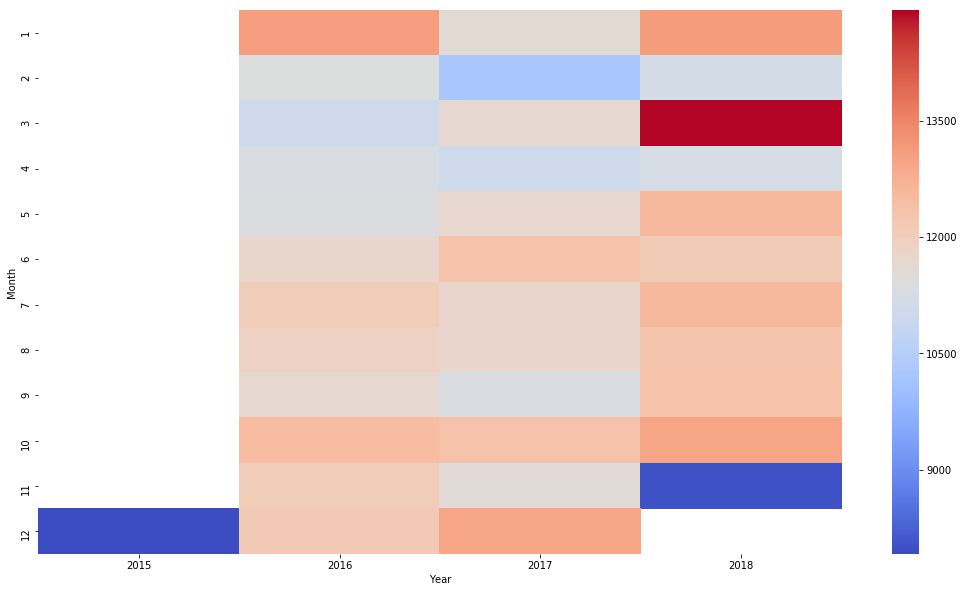

In [98]:
plt.figure(figsize=(18,10))
sns.heatmap(dayyear,cmap='coolwarm')